In [ ]:
i

In [3]:
from pathlib import Path
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)

In [32]:
# Load parameter data
input_path = Path.cwd() / 'ml_data/fitted_models' # path of files to be found
parameter_data = pd.read_csv(input_path / 'coefficients_lasso.csv')

parameter = 'gini_index'
df_coefficients = parameter_data[parameter_data['parameter'] == parameter].iloc[:, [1,3]].rename(columns={'value':'gini_index'})

# Load municipality data
muni_codes = pd.read_csv('municipality_number_codes.csv', sep=';', names=['muni_name', 'muni_code'] )


# Merge the parameter and the geo data 
merged_df = muni_codes.merge(df_coefficients, on='muni_code')

filtered_subset_gini_greater_than_one = merged_df[merged_df['gini_index'] != 0]

data = filtered_subset_gini_greater_than_one

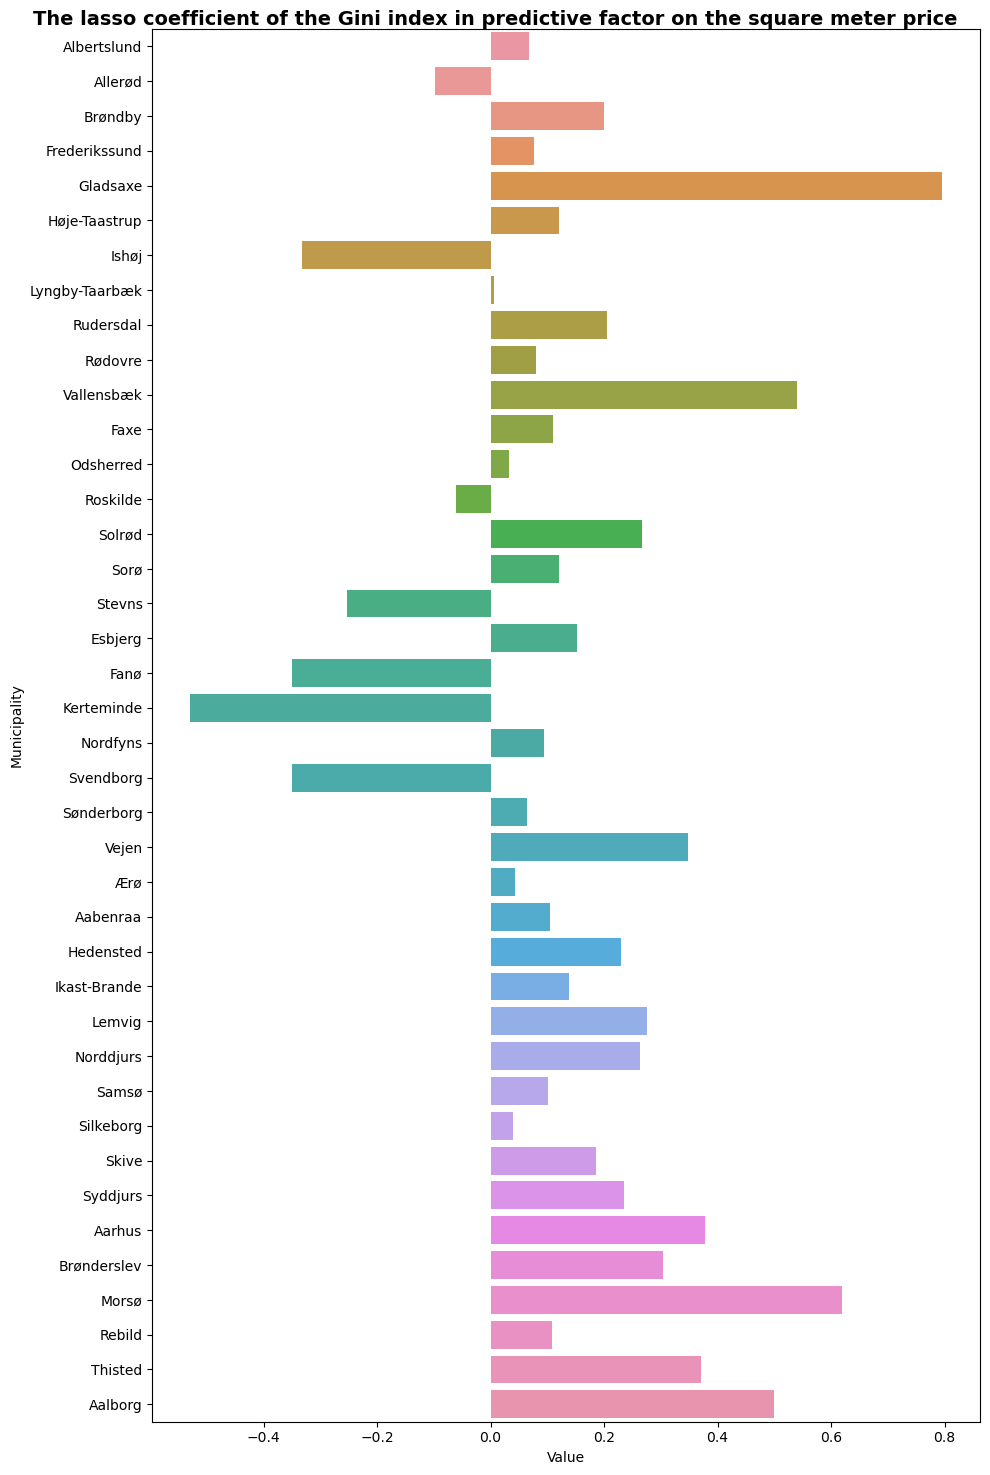

In [33]:
# Create a figure and subplots with two columns
fig, ax = plt.subplots(figsize=(10, 15))

# Create the bar plot using sns.barplot
ax = sns.barplot(x='gini_index', y='muni_name', data=data)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Municipality')

# Title the figure
fig.suptitle('The lasso coefficient of the Gini index in predictive factor on the square meter price', fontsize=14, fontweight='bold');

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()